### ANLY 590 -- Hw 1




In [427]:
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

#### read hitters.csv and drop na

In [428]:

df = pd.read_csv('Hitters.csv',index_col=0).dropna()


#### drop categorical variables

In [429]:
y = df.Salary
X = df.drop(['Salary',  'League', 'Division', 'NewLeague'], axis =1)

### 1.1 Lasso Regression 

In [439]:
n_alphas = 150
alphas = 10 ** np.linspace(10, -2, n_alphas)*0.5

In [440]:
#compute paths
coefs = []
for a in alphas:
    lasso = Lasso(alpha=a,normalize=True, fit_intercept=False)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

Text(0.5,1,'Lasso visualization of the coefficient trajectories')

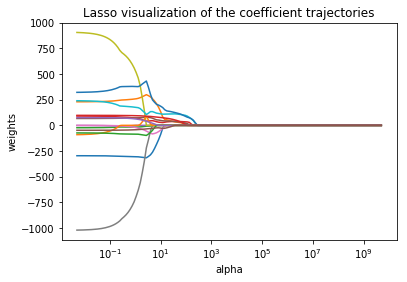

In [441]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso visualization of the coefficient trajectories')

0.2661660968677714


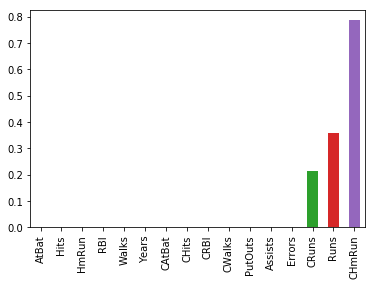

In [442]:
#cross validation to split data
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.4,random_state=12345)
lasso1 = Lasso(alpha=13.2,normalize=True,random_state=12345).fit(X_train,y_train) # Fit a lasso regression on the training data
predlasso = lasso1.predict(X_test) # Use this model to predict the test data
pd.Series(lasso1.coef_, index=X.columns).sort_values().plot(kind='bar') # visualize coefficients which are the final three predictors in the model
print(r2_score(y_test, predlasso)) # print R2

### the bar chart shows that the final three predictors are CHmRun, Runs, and CRuns

In [443]:
# use 10-fold cv to choose the optimize alpha
lassocv = LassoCV(alphas=None,cv=10, normalize=True).fit(X_train,y_train)
print(lassocv.score(X_train,y_train))
lassocv.alpha_

0.5843355315832677


0.04884132886321495

In [454]:
lasso2 = Lasso(alpha=lassocv.alpha_, normalize=True).fit(X_train, y_train)
pd.Series(lasso2.coef_, index=X.columns)

AtBat     -2.051485
Hits       5.552346
HmRun     -1.805013
Runs       2.948919
RBI       -0.183409
Walks      3.235614
Years     -2.729259
CAtBat    -0.395974
CHits      1.075811
CHmRun     2.318218
CRuns      1.272565
CRBI       0.000000
CWalks    -0.358484
PutOuts    0.318759
Assists    0.477111
Errors    -6.755007
dtype: float64

### Therefore, the optimal value of the regularization penalty is 0.049 and there are 15 predictors left in the model.

### 1.2 Ridge Regression

In [445]:
#compute paths
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

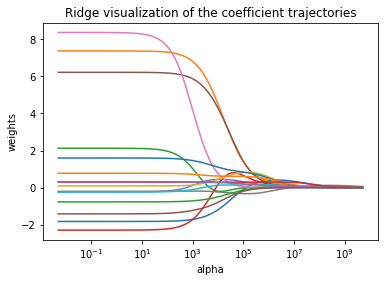

In [446]:
#display results
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge visualization of the coefficient trajectories')
plt.axis('tight')
plt.show()

In [447]:
ridge2 = Ridge(alpha=5, normalize=True).fit(X_train,y_train) # Fit a ridge regression on the training data when alpha = 5
pred2 = ridge2.predict(X_test) # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index=X.columns)) # Print coefficients
print(r2_score(y_test, pred2)) # print R2

AtBat      0.079646
Hits       0.393236
HmRun      1.441726
Runs       0.725713
RBI        0.585061
Walks      0.892533
Years      2.477712
CAtBat     0.009308
CHits      0.038193
CHmRun     0.321901
CRuns      0.081141
CRBI       0.079773
CWalks     0.083662
PutOuts    0.056103
Assists   -0.028793
Errors    -0.720557
dtype: float64
0.4067049960089093


#### to find the optimize alpha

In [450]:
ridgecv = RidgeCV(alphas=alphas,cv=None, normalize=True).fit(X_train,y_train)
print(ridgecv.score(X_train,y_train))
print(ridgecv.alpha_)

0.5774967299145708
0.005


In [451]:
ridge3 = Ridge(alpha=ridgecv.alpha_, normalize=True).fit(X_train, y_train)
ridge3.score(X_train,y_train)
ridge3.fit(X, y)
pd.Series(ridge3.coef_, index=X.columns)

AtBat     -1.986420
Hits       6.559553
HmRun     -0.488536
Runs      -0.486591
RBI        0.754098
Walks      5.481099
Years     -7.980862
CAtBat    -0.093748
CHits      0.176261
CHmRun     0.564179
CRuns      0.980723
CRBI       0.424979
CWalks    -0.640765
PutOuts    0.292338
Assists    0.331974
Errors    -3.256539
dtype: float64

### the optimal value of the regularization penalty is 0.005.

### 2 Explain in your own words the bias-variance tradeoff:  the purpose of the tradoff is to minimize bias and variance. However, in the real world, it is difficult to do. If a model has low bias and high variance,  overfitting happenes. If a model is too simple, it has high bias and low variance. Therefore, we need to find a balance between bias and variance. 
### What role does regularization play in this tradeoff?Make reference to your findings in number (1) to describe models of high/low bias and variance: Regularization can reduce the complex of the model and avoid the risk of overfitting. In number(1), there are two methods: ridge and lasso regression. Lasso regression shirnks the unimportant coefficients to zero, and decrease the variance for the models for players' salaries.In my case, there is only one predictor turns to 0, and the R2 is 0.58. Ridge regression keeps all the coeficients and reduce the model complexity, R2 is about 0.58. They are very close.